In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.tools as tls
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/python ML code/Wellbeing /Wellbeing_and_lifestyle_data_Kaggle.csv")

In [ ]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [ ]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [ ]:
df.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [ ]:
corrmat = df.corr()

corrmat["WORK_LIFE_BALANCE_SCORE"].sort_values(ascending=False)

WORK_LIFE_BALANCE_SCORE    1.000000
ACHIEVEMENT                0.561244
SUPPORTING_OTHERS          0.548851
TODO_COMPLETED             0.545503
PLACES_VISITED             0.529615
TIME_FOR_PASSION           0.516967
CORE_CIRCLE                0.507541
PERSONAL_AWARDS            0.504224
FLOW                       0.478199
LIVE_VISION                0.471311
DONATION                   0.458829
FRUITS_VEGGIES             0.452255
DAILY_STEPS                0.422981
WEEKLY_MEDITATION          0.416171
SOCIAL_NETWORK             0.412586
SUFFICIENT_INCOME          0.403561
SLEEP_HOURS                0.196395
BMI_RANGE                 -0.251988
LOST_VACATION             -0.266243
DAILY_SHOUTING            -0.273153
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

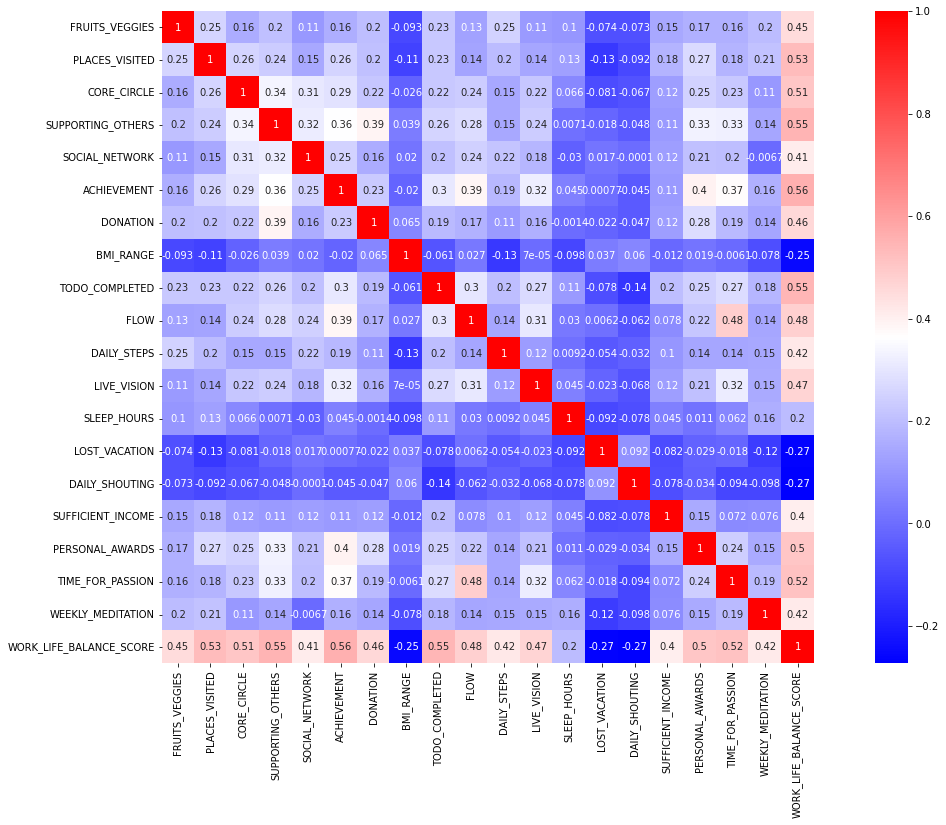

In [ ]:
plt.subplots(figsize=(22,12))
sns.heatmap(corrmat,cmap="bwr", square=True,annot=True);

In [ ]:
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')

In [ ]:
colomn = df.columns
colomn

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

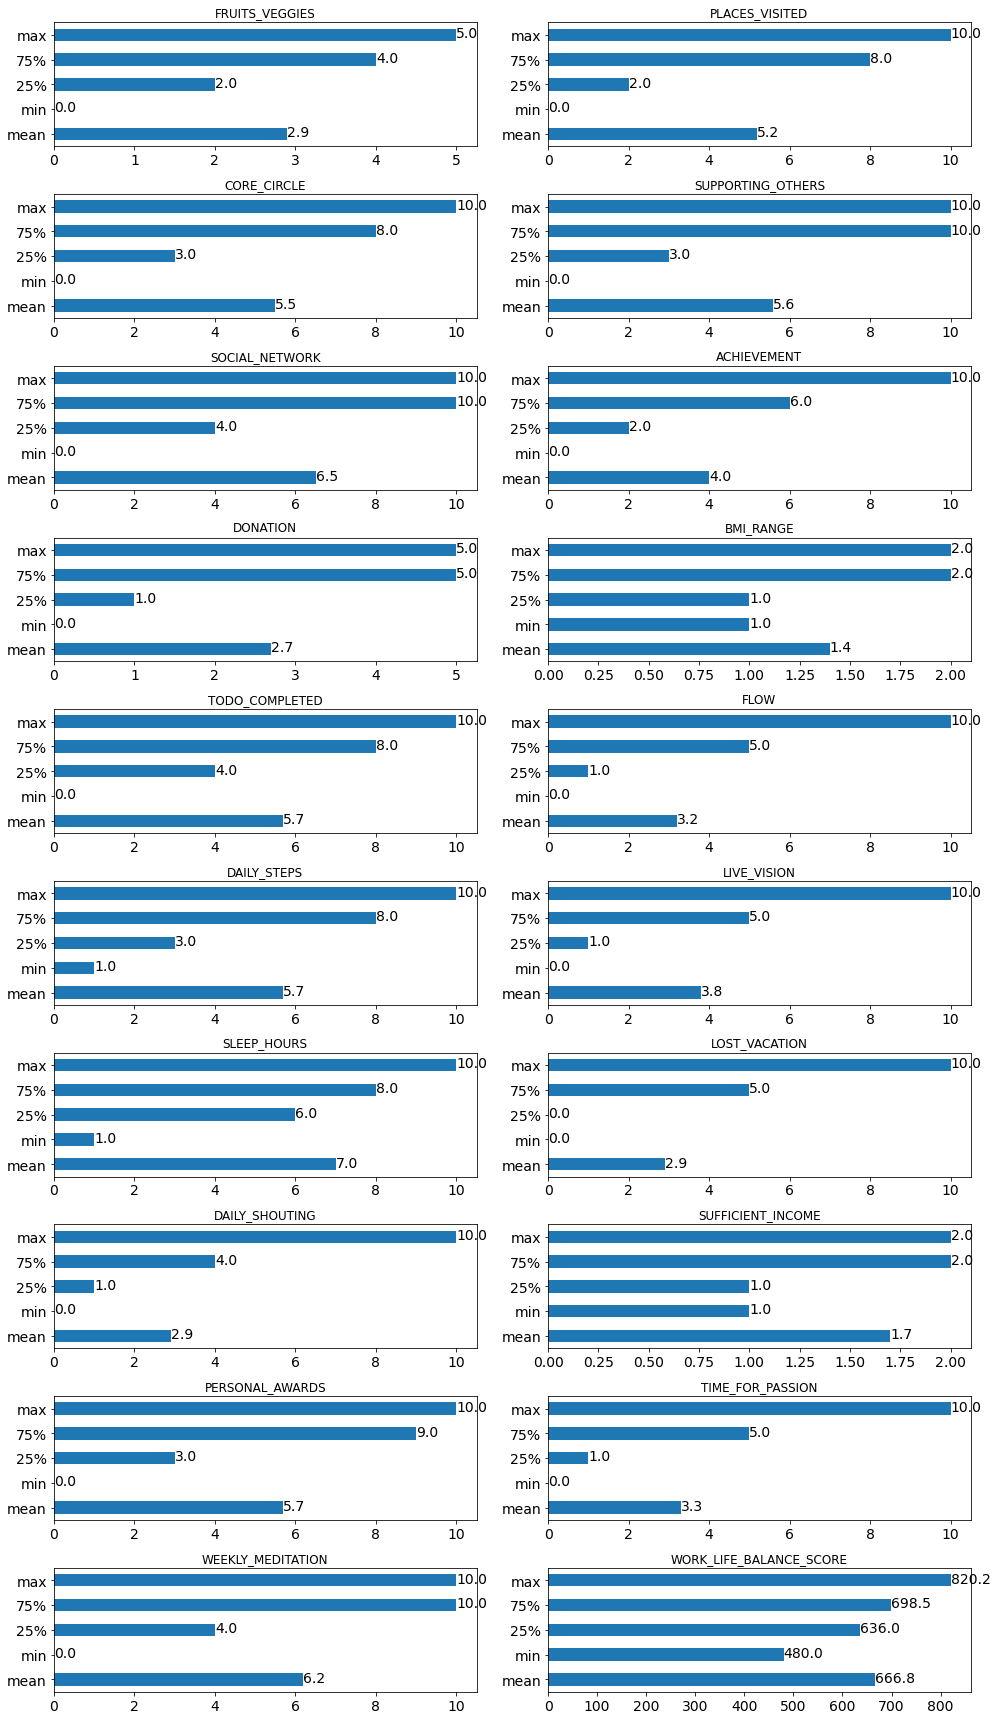

In [ ]:
def descriptive(df):
    desc=df.describe().round(1).drop({'count', 'std', '50%'}, axis=0)
    i=-0.1
    j=0
    Row = int(round(len(desc.columns.tolist())/2+0.1))
    f,ax = plt.subplots(Row,2, figsize=(28,18))
    for name in desc.columns.tolist():
        desc[name].plot(kind='barh', figsize=(14,24), title=name, ax=ax[round(i), j], fontsize=14)
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(v, k-0.1, str(v), color='black', size = 14)
        i +=0.5
        if j==0: j=1
        else: j=0
    f.tight_layout()
descriptive(df)

In [ ]:
df['MONTH'] = pd.DatetimeIndex(df['Timestamp']).month
#df.head(3)

In [ ]:
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,Female,Male
AGE,,
20 or less,1.226291,1.224138
21 to 35,1.357809,1.327620
36 to 50,1.465046,1.521842
51 or more,1.525535,1.524113


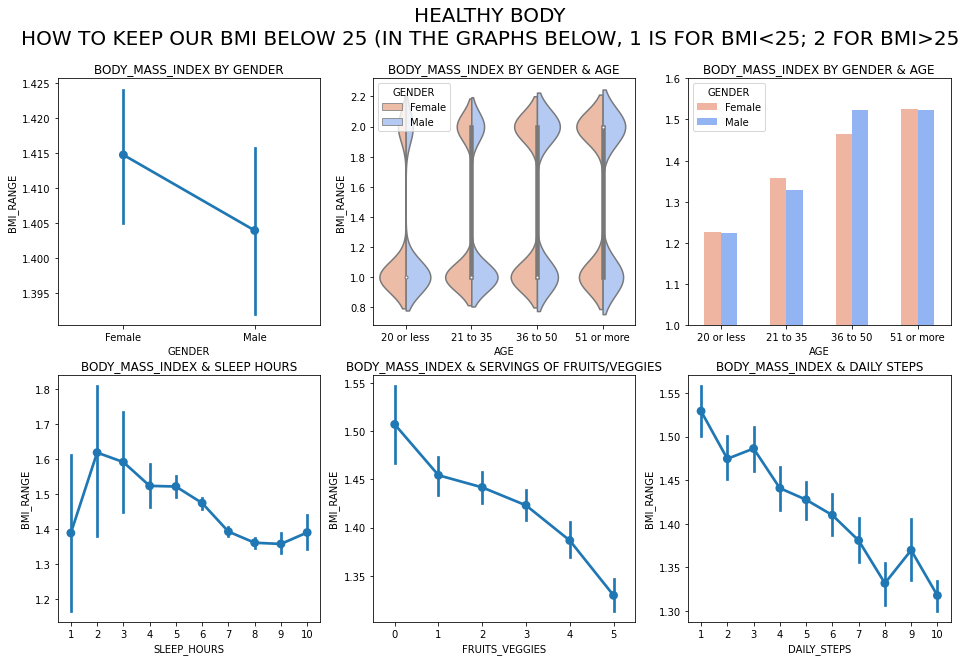

In [ ]:
# HEALTHY BODY
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=df, ax = ax[0,0])
sns.violinplot(x = 'AGE', y = 'BMI_RANGE', hue = 'GENDER', data = df, palette='coolwarm_r',
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,1])



sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

In [ ]:
df['DAILY_STRESS']=pd.to_numeric(df['DAILY_STRESS'],errors = 'coerce')

In [ ]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.045070,2.347480
21 to 35,2.992375,2.569758
36 to 50,2.948666,2.799292
51 or more,2.728939,2.418562


In [ ]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.045070,2.347480
21 to 35,2.992375,2.569758
36 to 50,2.948666,2.799292
51 or more,2.728939,2.418562


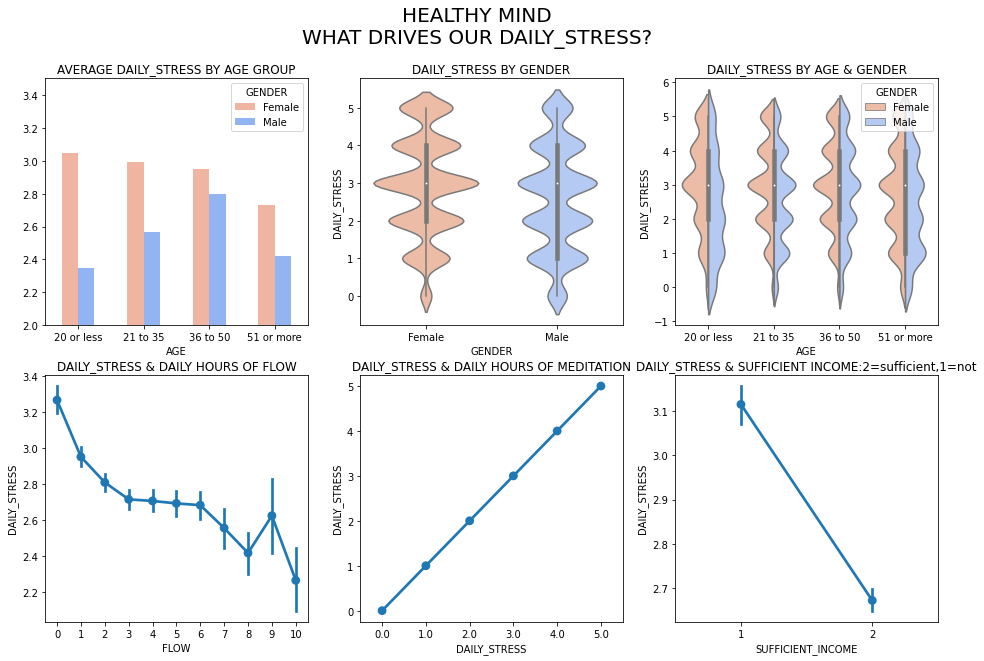

In [ ]:
# HEALTHY MIND
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE DAILY_STRESS BY AGE GROUP')
ax[0,1].set_title('DAILY_STRESS BY GENDER')
ax[0,2].set_title('DAILY_STRESS BY AGE & GENDER')
ax[1,0].set_title('DAILY_STRESS & DAILY HOURS OF FLOW')
ax[1,1].set_title('DAILY_STRESS & DAILY HOURS OF MEDITATION')
ax[1,2].set_title('DAILY_STRESS & SUFFICIENT INCOME:2=sufficient,1=not')

ax[0,0].set_ylim([2, 3.5])
df3.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='DAILY_STRESS', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'DAILY_STRESS', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'FLOW', y = 'DAILY_STRESS',  data=df, ax = ax[1,0])
sns.pointplot(x = 'DAILY_STRESS', y = 'DAILY_STRESS', data=df, ax = ax[1,1])
sns.pointplot(x = 'SUFFICIENT_INCOME', y = 'DAILY_STRESS',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY MIND\nWHAT DRIVES OUR DAILY_STRESS?', fontsize=20)
plt.show()

In [ ]:
df4 = df.pivot_table(values='ACHIEVEMENT', index=['AGE'], columns=['GENDER'], )
df4.head()

GENDER,Female,Male
AGE,,
20 or less,4.352113,4.086207
21 to 35,3.887602,3.781067
36 to 50,3.996285,4.156434
51 or more,4.012222,4.227480


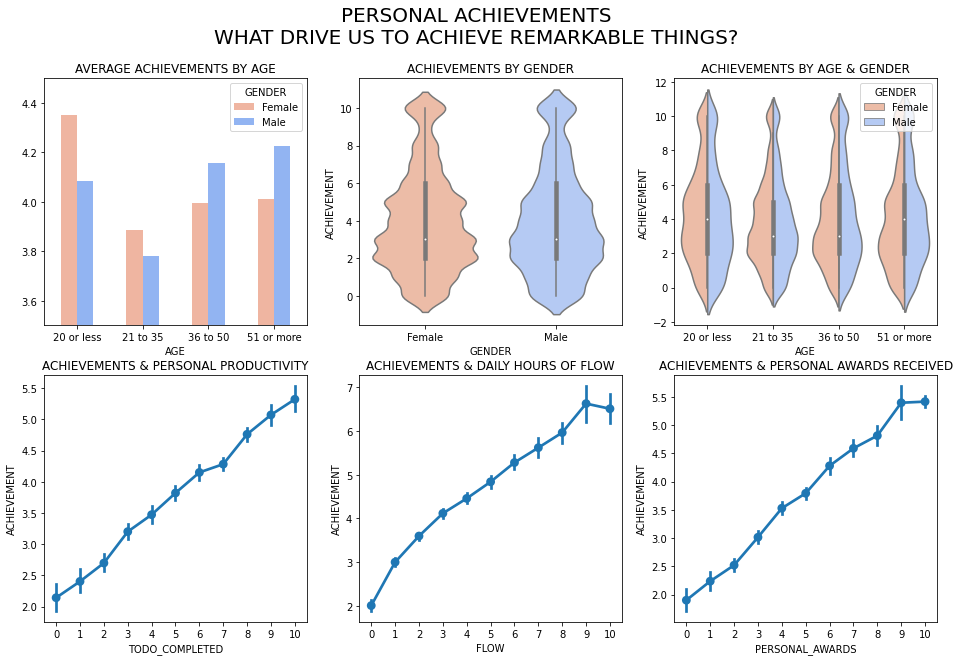

In [ ]:
# EXPERTISE
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE ACHIEVEMENTS BY AGE')
ax[0,1].set_title('ACHIEVEMENTS BY GENDER')
ax[0,2].set_title('ACHIEVEMENTS BY AGE & GENDER')
ax[1,0].set_title('ACHIEVEMENTS & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('ACHIEVEMENTS & DAILY HOURS OF FLOW')
ax[1,2].set_title('ACHIEVEMENTS & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3.5, 4.5])
df4.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='ACHIEVEMENT', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'ACHIEVEMENT', palette='coolwarm_r', hue = 'GENDER', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'ACHIEVEMENT',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'ACHIEVEMENT',  data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'ACHIEVEMENT',  data=df, ax = ax[1,2])

f.suptitle('PERSONAL ACHIEVEMENTS\nWHAT DRIVE US TO ACHIEVE REMARKABLE THINGS?', fontsize=20)
plt.show()

In [ ]:
df5 = df.pivot_table(values='CORE_CIRCLE', index=['AGE'], columns=['GENDER'], )
df5.head()

GENDER,Female,Male
AGE,,
20 or less,5.781221,5.484085
21 to 35,5.603784,5.105960
36 to 50,5.789936,5.159386
51 or more,5.798341,5.063694


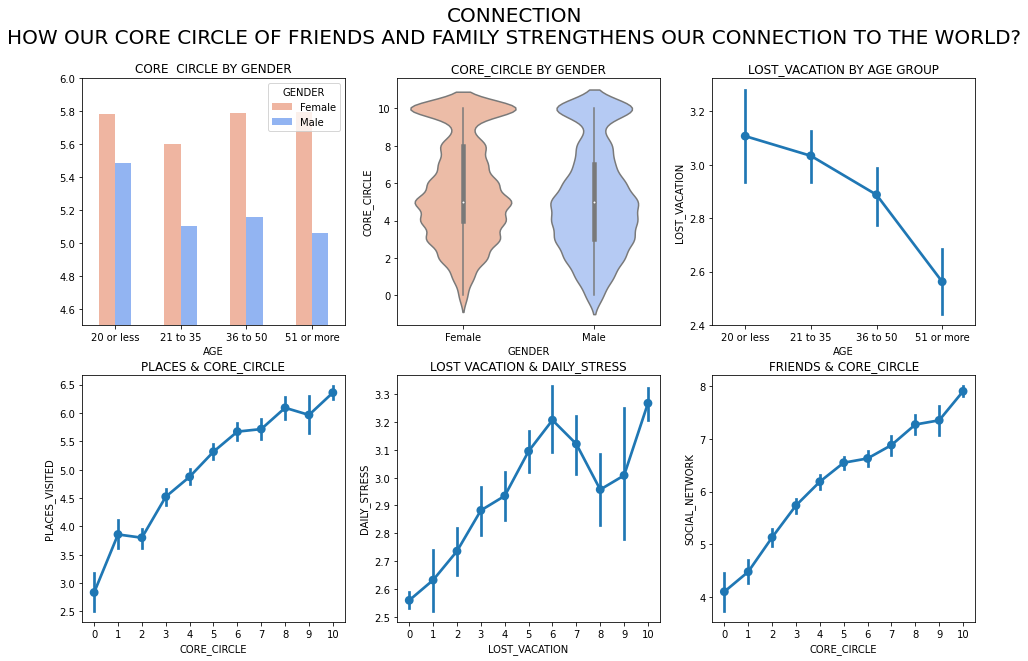

In [ ]:
# CONNECTION
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('CORE  CIRCLE BY GENDER')
ax[0,1].set_title('CORE_CIRCLE BY GENDER')
ax[0,2].set_title('LOST_VACATION BY AGE GROUP')
ax[1,0].set_title('PLACES & CORE_CIRCLE')
ax[1,1].set_title('LOST VACATION & DAILY_STRESS')
ax[1,2].set_title('FRIENDS & CORE_CIRCLE')

ax[0,0].set_ylim([4.5, 6])
df5.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='CORE_CIRCLE', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.pointplot(x = 'AGE', y = 'LOST_VACATION',order=['20 or less', '21 to 35', '36 to 50', '51 or more'], data = df, ax = ax[0,2])
sns.pointplot(x = 'CORE_CIRCLE',  y = 'PLACES_VISITED',    data=df, ax = ax[1,0])
sns.pointplot(x = 'LOST_VACATION',  y = 'DAILY_STRESS',    data=df, ax = ax[1,1])
sns.pointplot(x = 'CORE_CIRCLE',  y = 'SOCIAL_NETWORK',    data=df, ax = ax[1,2])

f.suptitle('CONNECTION\nHOW OUR CORE CIRCLE OF FRIENDS AND FAMILY STRENGTHENS OUR CONNECTION TO THE WORLD?', fontsize=20)
plt.show()

In [ ]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,Female,Male
AGE,,
20 or less,3.127700,3.653846
21 to 35,3.322508,3.308142
36 to 50,3.209726,3.257969
51 or more,3.421650,3.573248


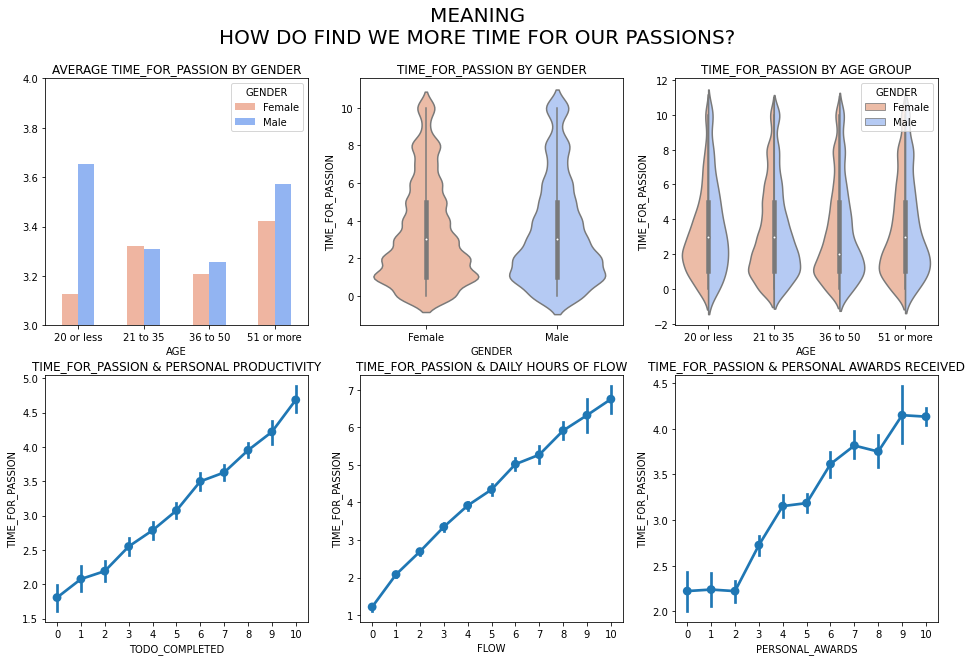

In [ ]:
# PASSION
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE TIME_FOR_PASSION BY GENDER')
ax[0,1].set_title('TIME_FOR_PASSION BY GENDER')
ax[0,2].set_title('TIME_FOR_PASSION BY AGE GROUP')
ax[1,0].set_title('TIME_FOR_PASSION & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('TIME_FOR_PASSION & DAILY HOURS OF FLOW')
ax[1,2].set_title('TIME_FOR_PASSION & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3, 4])
df6.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='TIME_FOR_PASSION', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'TIME_FOR_PASSION', palette='coolwarm_r', hue = 'GENDER', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,2])

f.suptitle('MEANING\nHOW DO FIND WE MORE TIME FOR OUR PASSIONS?', fontsize=20)
plt.show()